# Exploratory Data Analysis (EDA)

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet('./data/dota2_matches_cleaned.parquet')
df.head()

,league,league_tier,league_start_date_time,league_end_date_time,league_region,series_type,match_start_date_time,match_duration_seconds,first_blood_time_seconds,radiant_team_id,...,dire_player_4_networth,dire_player_5_name,dire_player_5_hero,dire_player_5_position,dire_player_5_lane,dire_player_5_role,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth
9,European Pro League 2023-2024 Season,PROFESSIONAL,2023-10-30 22:00:00,2024-10-30 22:00:00,EUROPE,BEST_OF_THREE,2024-10-14 20:29:53,2233,0,9017006,...,9343,proletariy,Underlord,POSITION_3,OFF_LANE,CORE,1,8,7,15178
11,European Pro League 2023-2024 Season,PROFESSIONAL,2023-10-30 22:00:00,2024-10-30 22:00:00,EUROPE,BEST_OF_THREE,2024-10-14 19:33:03,1656,23,8588969,...,10551,Riddys,Lich,POSITION_5,SAFE_LANE,HARD_SUPPORT,3,2,21,8247
14,European Pro League 2023-2024 Season,PROFESSIONAL,2023-10-30 22:00:00,2024-10-30 22:00:00,EUROPE,BEST_OF_THREE,2024-10-14 18:25:18,2063,121,9216247,...,13644,MaTson,Earthshaker,POSITION_2,MID_LANE,CORE,15,3,14,19558
16,European Pro League 2023-2024 Season,PROFESSIONAL,2023-10-30 22:00:00,2024-10-30 22:00:00,EUROPE,BEST_OF_THREE,2024-10-14 17:10:53,2548,215,9216247,...,17699,MaTson,Earthshaker,POSITION_2,MID_LANE,CORE,20,4,11,29511
18,Ultras Dota Pro League 2023-24,PROFESSIONAL,2023-10-31 22:00:00,2024-10-31 22:00:00,CIS,BEST_OF_THREE,2024-10-14 16:12:43,1739,172,8831040,...,7078,fungame,Spectre,POSITION_1,SAFE_LANE,CORE,4,7,14,13663


    * Para iniciar vamos a crear la columna radiant_win, donde usaremos las columnas de id que guardamos en la limpieza de datos, esto con el fin de facilitar el análisis posterior

In [244]:
df['radiant_win'] = (df['winner_id'] == df['radiant_team_id']).astype('int')

In [245]:
# convert into categorical variable
df['radiant_win'] = df['radiant_win'].astype('object')

In [246]:
# drop the id cols
df = df.drop(['winner_id', 'radiant_team_id', 'dire_team_id'], axis=1)

In [247]:
# verify null values only for networth
df.isna().sum()[df.isna().sum()>0]

radiant_player_1_networth    37239
radiant_player_2_networth    37239
radiant_player_3_networth    37239
radiant_player_4_networth    37239
radiant_player_5_networth    37239
dire_player_1_networth       37239
dire_player_2_networth       37239
dire_player_3_networth       37239
dire_player_4_networth       37239
dire_player_5_networth       37239
dtype: int64

In [248]:
# check the data info
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 137520 entries, 9 to 161229
Data columns (total 104 columns):
 #    Column                     Dtype         
---   ------                     -----         
 0    league                     object        
 1    league_tier                object        
 2    league_start_date_time     datetime64[ns]
 3    league_end_date_time       datetime64[ns]
 4    league_region              object        
 5    series_type                object        
 6    match_start_date_time      datetime64[ns]
 7    match_duration_seconds     Int32         
 8    first_blood_time_seconds   Int32         
 9    radiant_team_name          object        
 10   dire_team_name             object        
 11   radiant_kills              Int16         
 12   dire_kills                 Int16         
 13   radiant_player_1_name      object        
 14   radiant_player_1_hero      object        
 15   radiant_player_1_position  object        
 16   radiant_player_1_lane  

* Eliminamos las variables de tipo id ya que no serán relevantes para el análisis

## Univariate analysis

### Categorical columns

* Ya que son muchas columnas, y algunas son similares, vamos a dividirlas en las generales, y las que corresponden a los jugadores, además solo consideraremos a las que tienen cardinalidad baja (<10 categorías/divisiones)

In [249]:
# get all categorical cols
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['league', 'league_tier', 'league_region', 'series_type',
       'radiant_team_name', 'dire_team_name', 'radiant_player_1_name',
       'radiant_player_1_hero', 'radiant_player_1_position',
       'radiant_player_1_lane', 'radiant_player_1_role',
       'radiant_player_2_name', 'radiant_player_2_hero',
       'radiant_player_2_position', 'radiant_player_2_lane',
       'radiant_player_2_role', 'radiant_player_3_name',
       'radiant_player_3_hero', 'radiant_player_3_position',
       'radiant_player_3_lane', 'radiant_player_3_role',
       'radiant_player_4_name', 'radiant_player_4_hero',
       'radiant_player_4_position', 'radiant_player_4_lane',
       'radiant_player_4_role', 'radiant_player_5_name',
       'radiant_player_5_hero', 'radiant_player_5_position',
       'radiant_player_5_lane', 'radiant_player_5_role', 'dire_player_1_name',
       'dire_player_1_hero', 'dire_player_1_position', 'dire_player_1_lane',
       'dire_player_1_role', 'dire_player_2_name', 'dire_playe

In [250]:
general_cols = [ col for col in categorical_cols if '_player_' not in col and df[col].nunique() <= 10]
# general_cols = [ col for col in categorical_cols if '_player_' not in col]
general_cols

['league_tier', 'league_region', 'series_type', 'radiant_win']

In [251]:
# for player cols, we just need a sample, because the format is the same for the other ones
player_cols_sample = [ col for col in categorical_cols if '_player_1_' in col and df[col].nunique() <= 10]
player_cols_sample

['radiant_player_1_position',
 'radiant_player_1_lane',
 'radiant_player_1_role',
 'dire_player_1_position',
 'dire_player_1_lane',
 'dire_player_1_role']

* Graficamos la distribución de las variables categóricas

In [252]:
def plot_univariate_distribution(cols, n_cols):
    
    # n_cols = 3
    n_rows = (len(cols) - 1) // n_cols + 1
    
    # additional config provided by deepseek to prevent asian characters warning
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # Fuente que soporta CJK
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']  # Si no funciona agregar SimHei(necesita installation), usar opciones comunes
    plt.rcParams['axes.unicode_minus'] = False    # Evita errores con símbolos negativos
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    
    if n_cols > 1 or n_rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, col in enumerate(cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
    
    for j in range(len(cols), len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

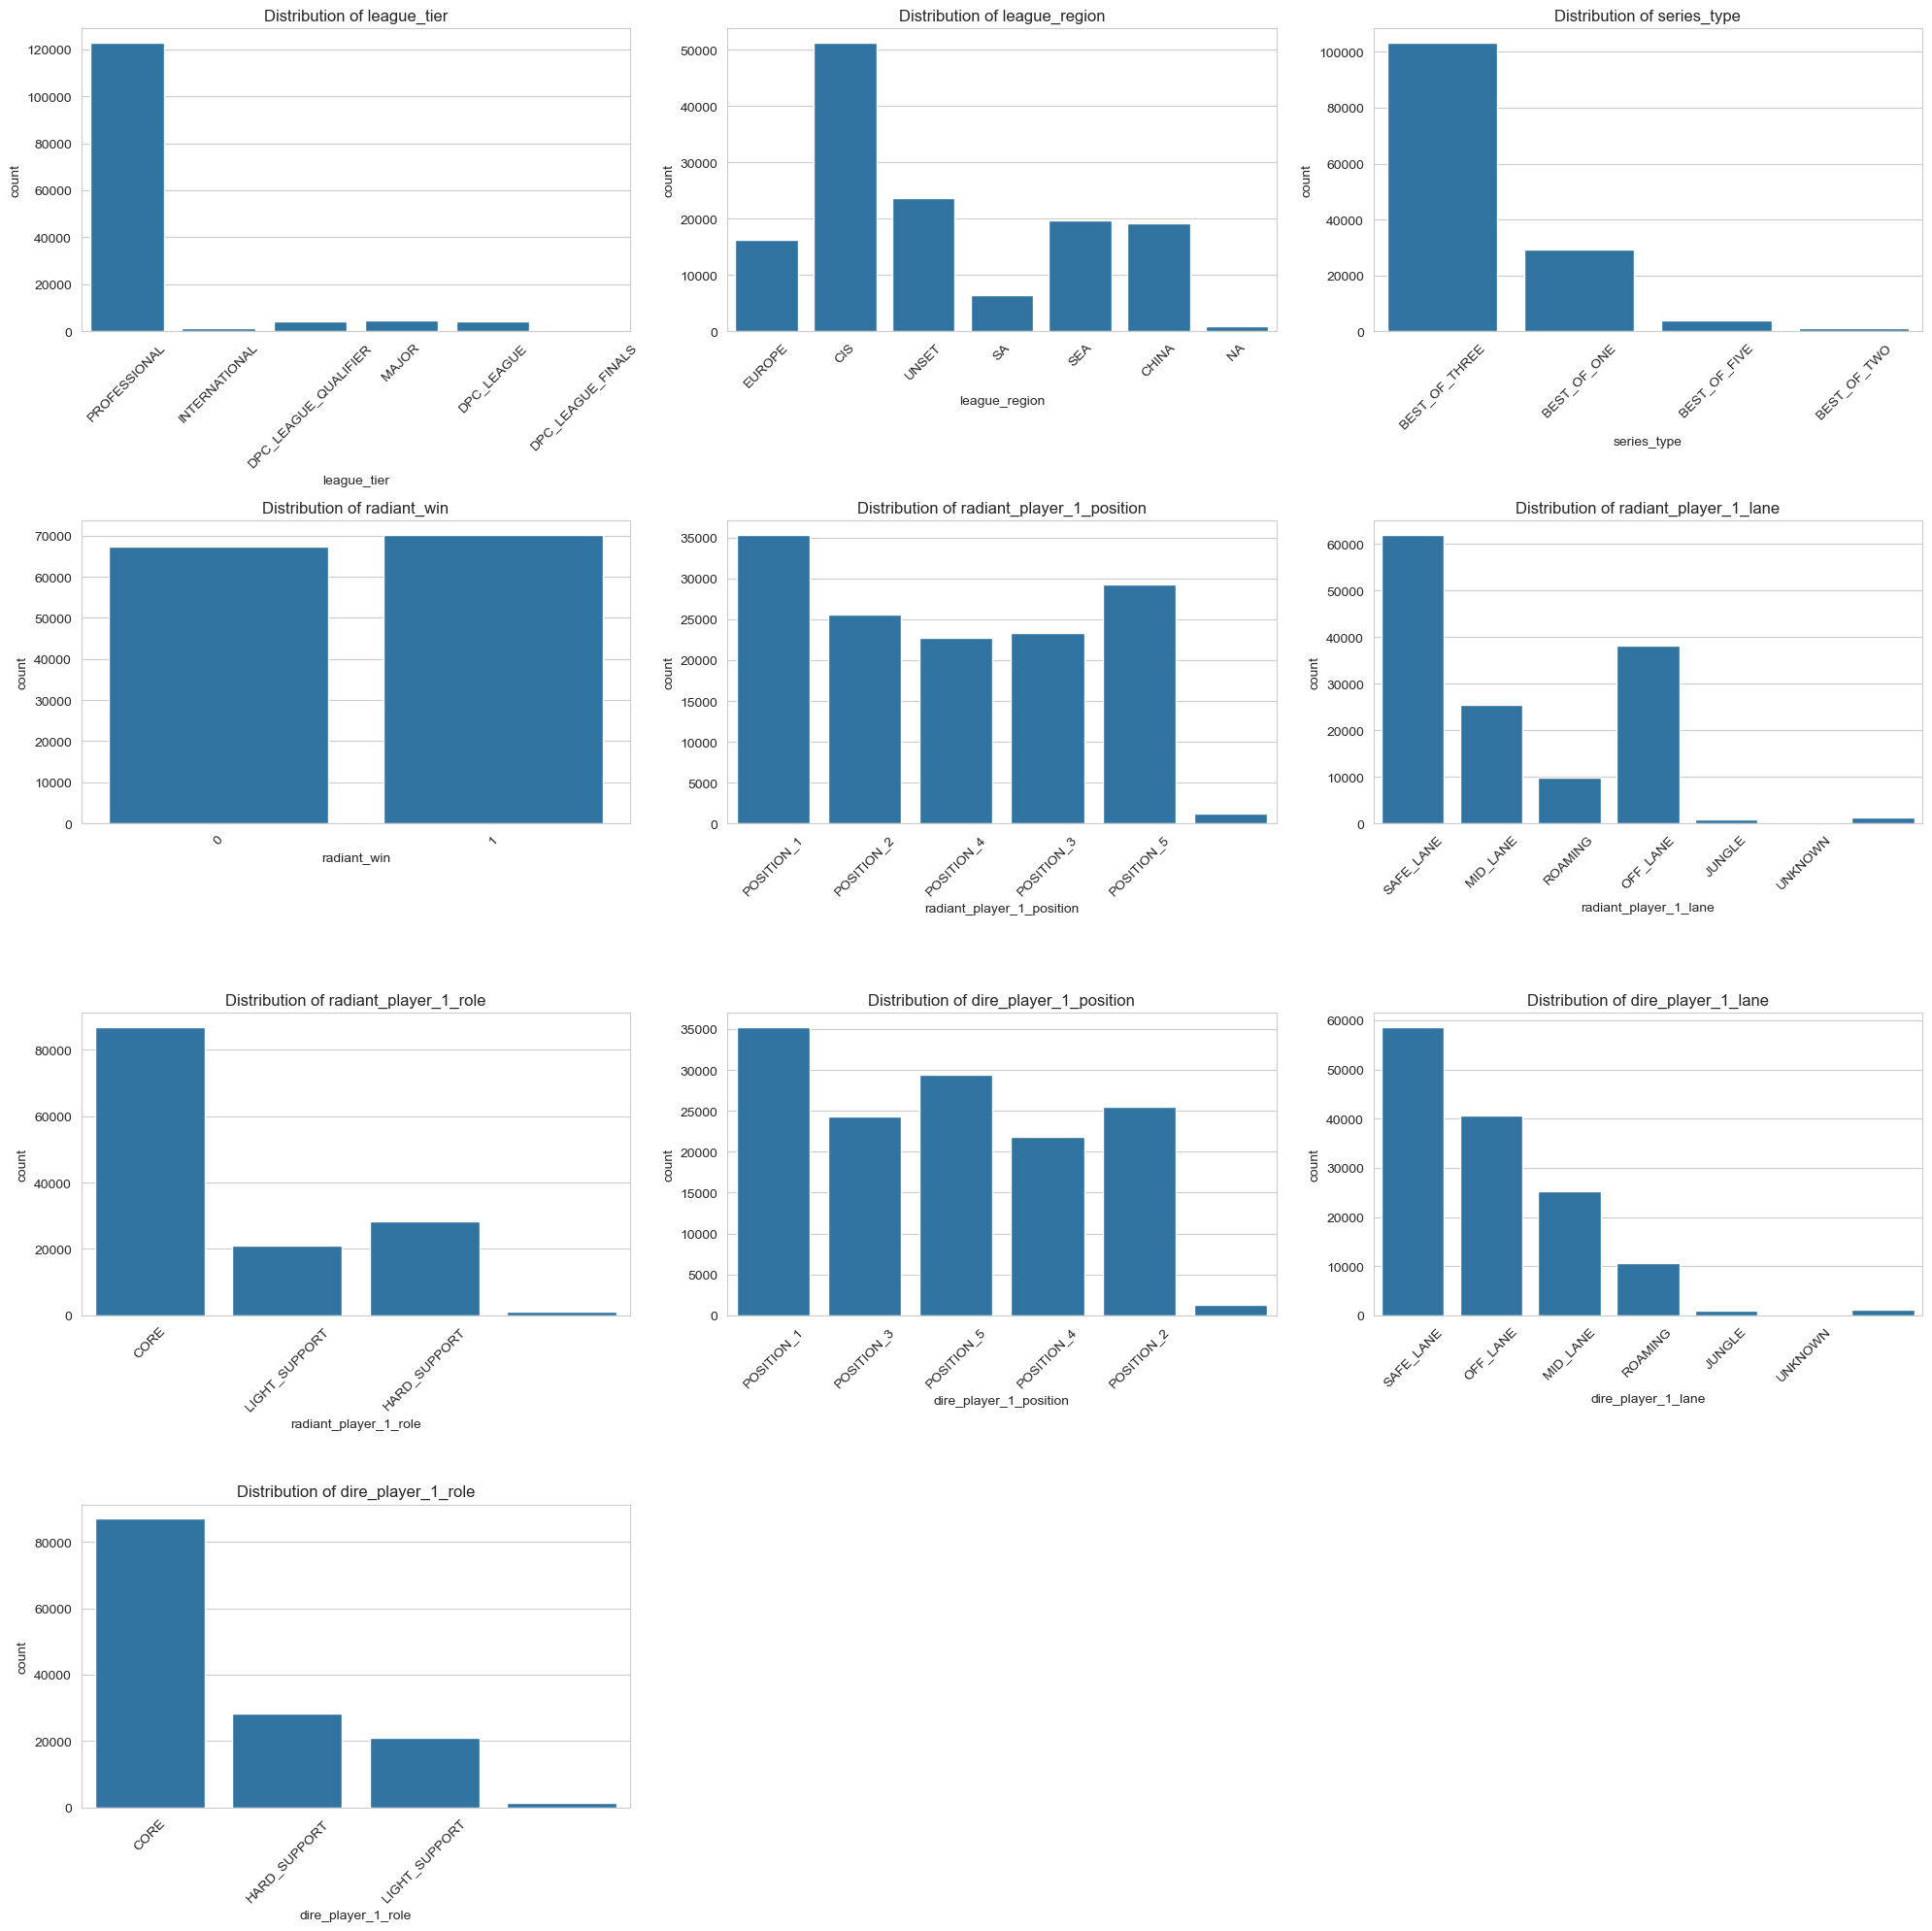

In [253]:
plot_univariate_distribution(general_cols + player_cols_sample, 3)

* Vemos que la distribución de estas columnas que seleccionamos es en general correcta, pero parece que hay ciertos valores en blanco o vacíos, quizás los omitimos en la etapa de data cleaning, así que vamos a revisarlos aquí

In [254]:
pd.concat([
df['radiant_player_1_position'].value_counts(),
df['radiant_player_1_lane'].value_counts(),
df['radiant_player_1_role'].value_counts()
], keys=['radiant_p1_pos', 'radiant_p1_lane', 'radiant_p1_role'])

radiant_p1_pos   POSITION_1       35347
                 POSITION_5       29250
                 POSITION_2       25601
                 POSITION_3       23375
                 POSITION_4       22700
                                   1247
radiant_p1_lane  SAFE_LANE        61928
                 OFF_LANE         38153
                 MID_LANE         25369
                 ROAMING           9810
                                   1247
                 JUNGLE             829
                 UNKNOWN            184
radiant_p1_role  CORE             86864
                 HARD_SUPPORT     28339
                 LIGHT_SUPPORT    21070
                                   1247
Name: count, dtype: int64

* Vemos que la cantidad de registros es la misma, así que probablemente son los mismos registros, y según mi conocimiento en el tema, no son datos faltantes ya que las divisiones están completas, e imputarlos sería difícil ya que es difícil identificar a qué grupo pertenece, y reemplazar con valores estándar como media, mediana o moda podría no ser preciso. Por este motivo solo las eliminaremos, además de que son muy pocos registros

In [255]:
df = df.drop(df[df['radiant_player_1_role']==''].index)
df.shape

(136273, 104)

* También eliminamos las filas con valor "Unknown", ya que no aportarán al análisis y además son muy pocos. Lo hacemos para todas las columnas categóricas ya que encontramos que varias columnas tienen algunas pocas

In [256]:
df = df.drop(df[df[categorical_cols].eq('UNKNOWN').any(axis=1)].index)

* Graficamos nuevamente la distribución

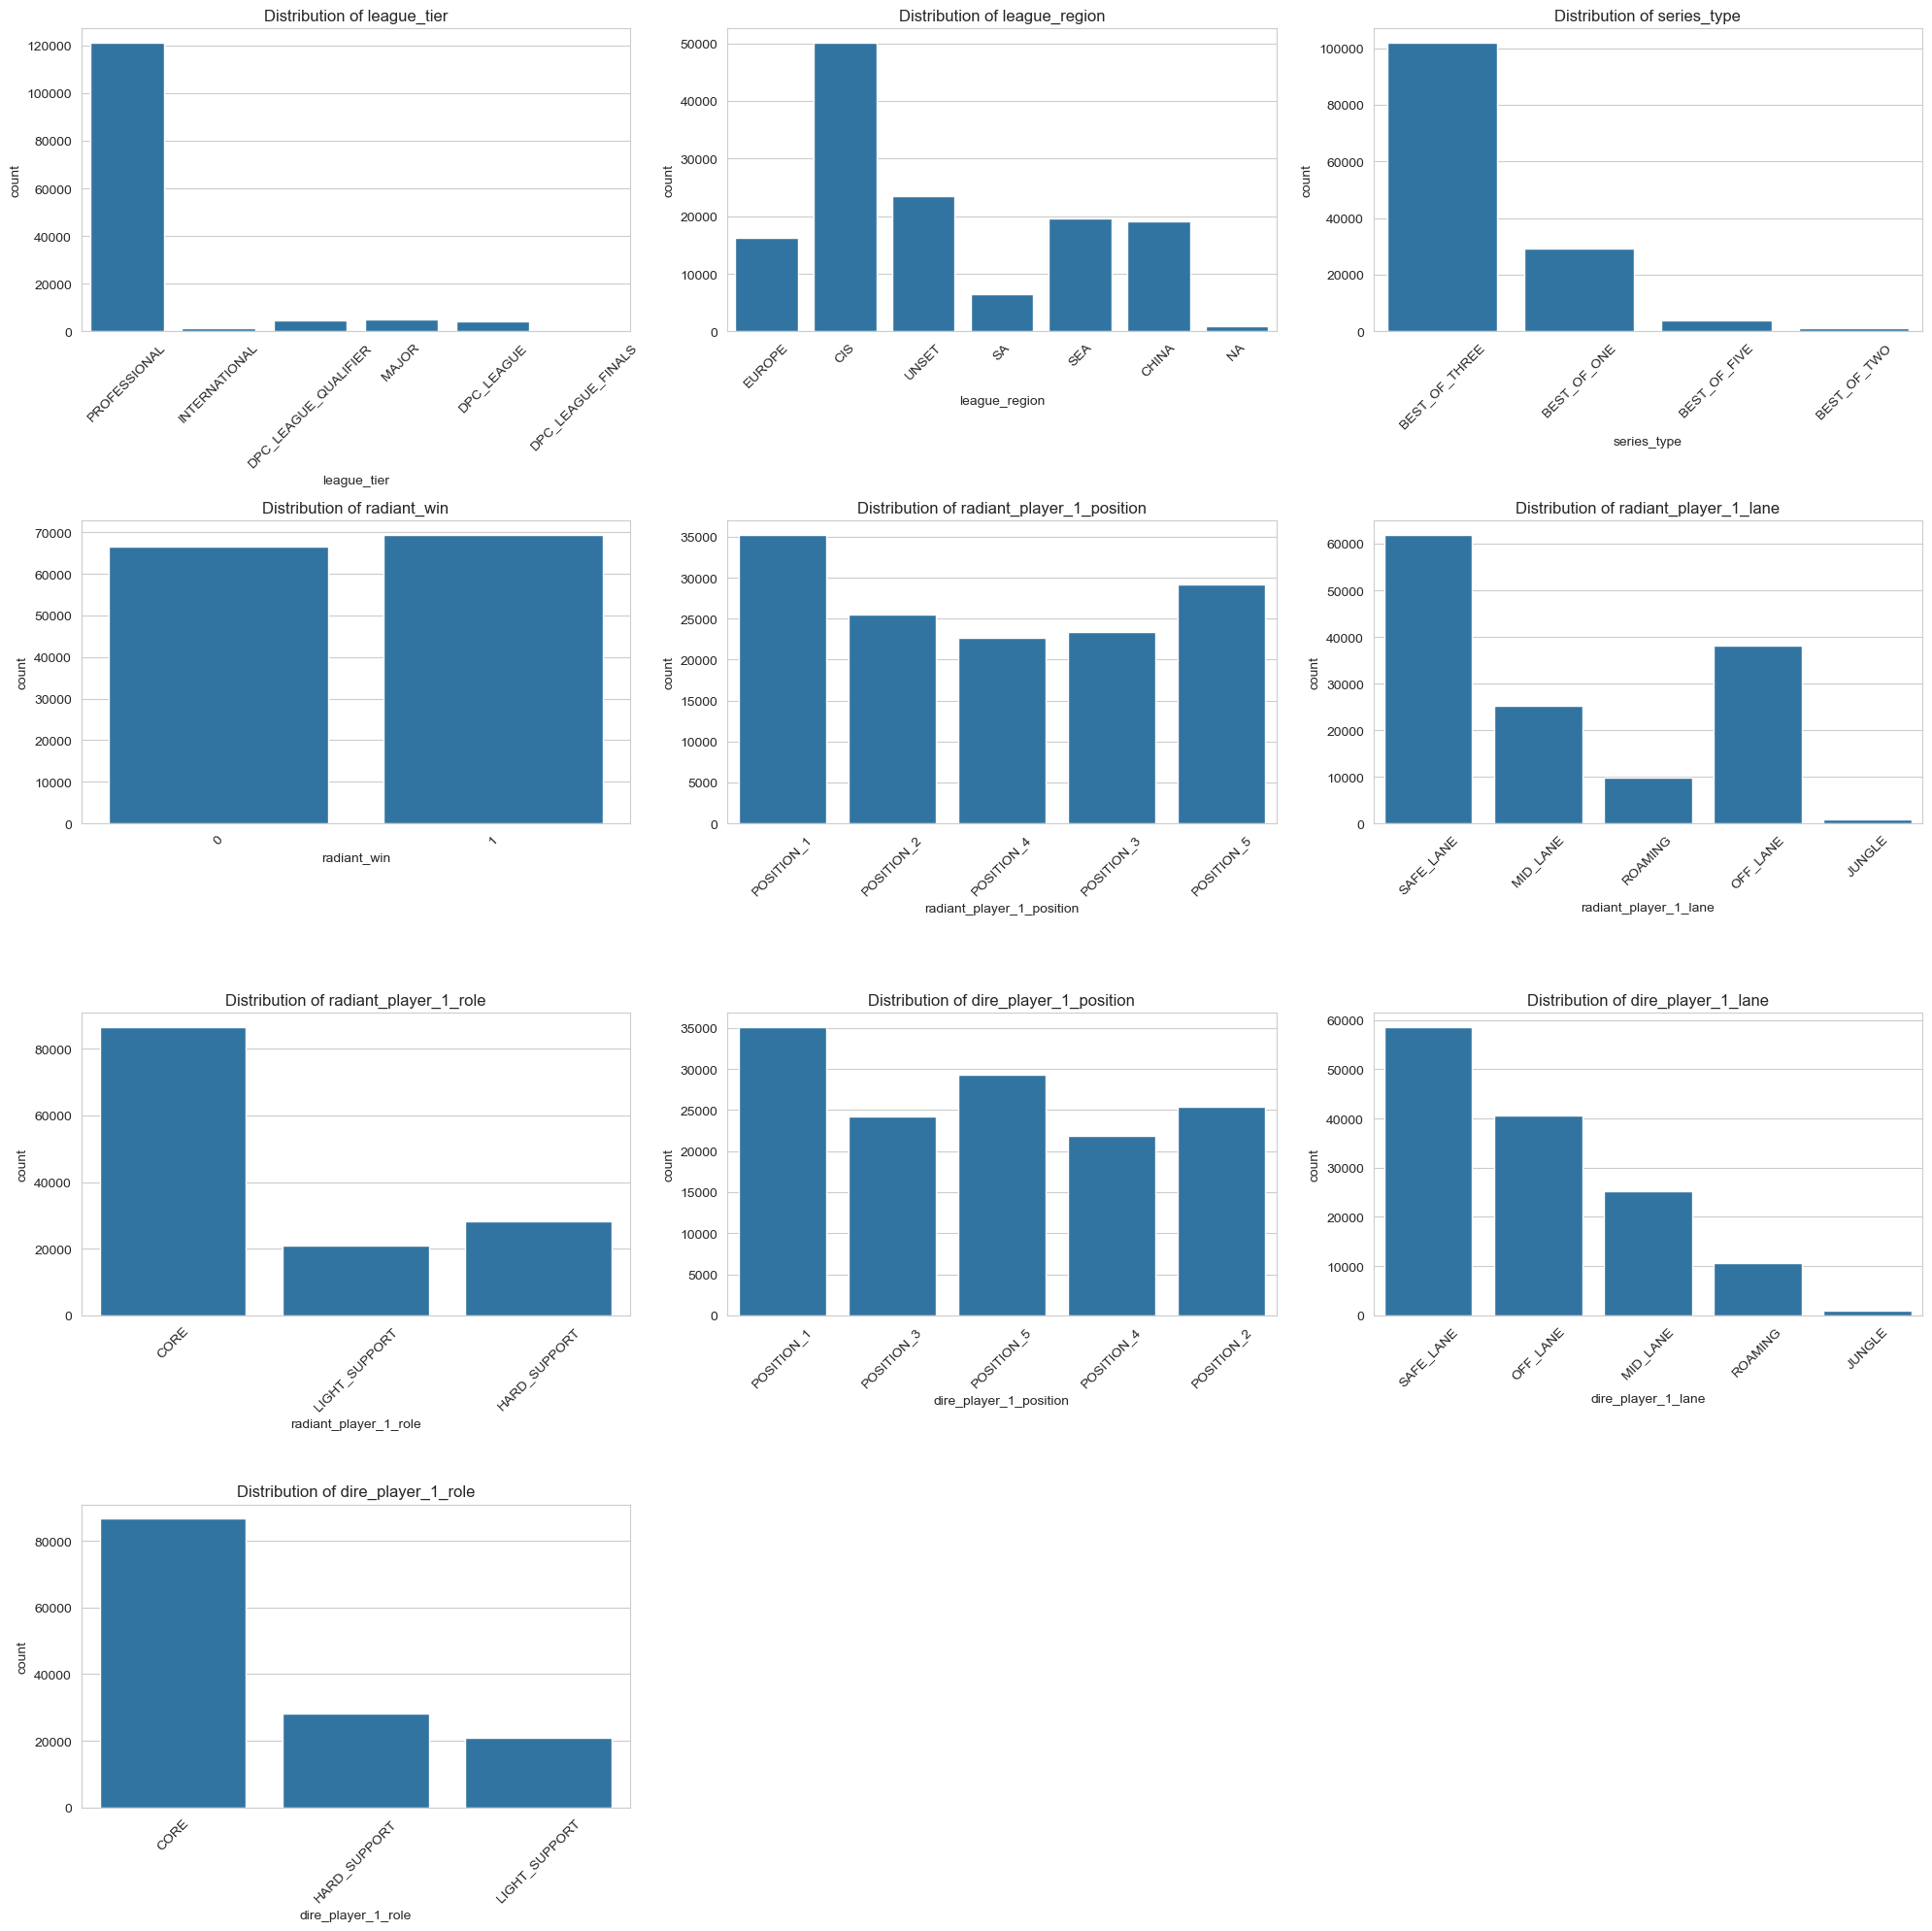

In [257]:
plot_univariate_distribution(general_cols + player_cols_sample, 3)

    * Vemos que cantidad de victorias del lado radiant es similar a la de dire, pero radiant está ligeramente por encima
    * Podemos identificar a primera vista que el tier de la liga principal es la "PROFESIONAL", parece ser de un 90% aproximadamente
    * En league_region vemos que hay más registros de la "CIS", y la menor es "NA", las demás son similares, siendo 'SA' la menor de estas
    * En el tipo de partida, vemos que por diferencia, el más jugado es el de BEST_OF_THREE
    * Vempos que el rol con mayor frecuencia es el CORE, ya que este incluye 3 coles (hard carry, midlane y offlane)
    * Las distribuciones por jugador por sí solas no ofrecen mucha información, ya que estas siempre se cumplen en todas las partidas, así que deberían ser similares

### Numeric columns

In [258]:
numeric_cols = df.select_dtypes(include='int').columns
numeric_cols

Index(['match_duration_seconds', 'first_blood_time_seconds',
       'radiant_player_1_networth', 'radiant_player_2_networth',
       'radiant_player_3_networth', 'radiant_player_4_networth',
       'radiant_player_5_networth', 'dire_player_1_networth',
       'dire_player_2_networth', 'dire_player_3_networth',
       'dire_player_4_networth', 'dire_player_5_networth'],
      dtype='object')

In [259]:
def plot_univariate_distribution_numeric(cols, n_cols, plot='hist'):
    
    n_rows = (len(cols) - 1) // n_cols + 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    
    if n_cols > 1 or n_rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, col in enumerate(cols):
        # col_count = df[col].value_counts()
        if plot == 'hist':
            sns.histplot(data=df, x=col, ax=axes[i], kde=True, color='purple')
        elif plot == 'box':
            sns.boxplot(data=df, x=col, ax=axes[i])
            
        axes[i].set_title(f'Distribution of {col}')
    
    for j in range(len(cols), len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

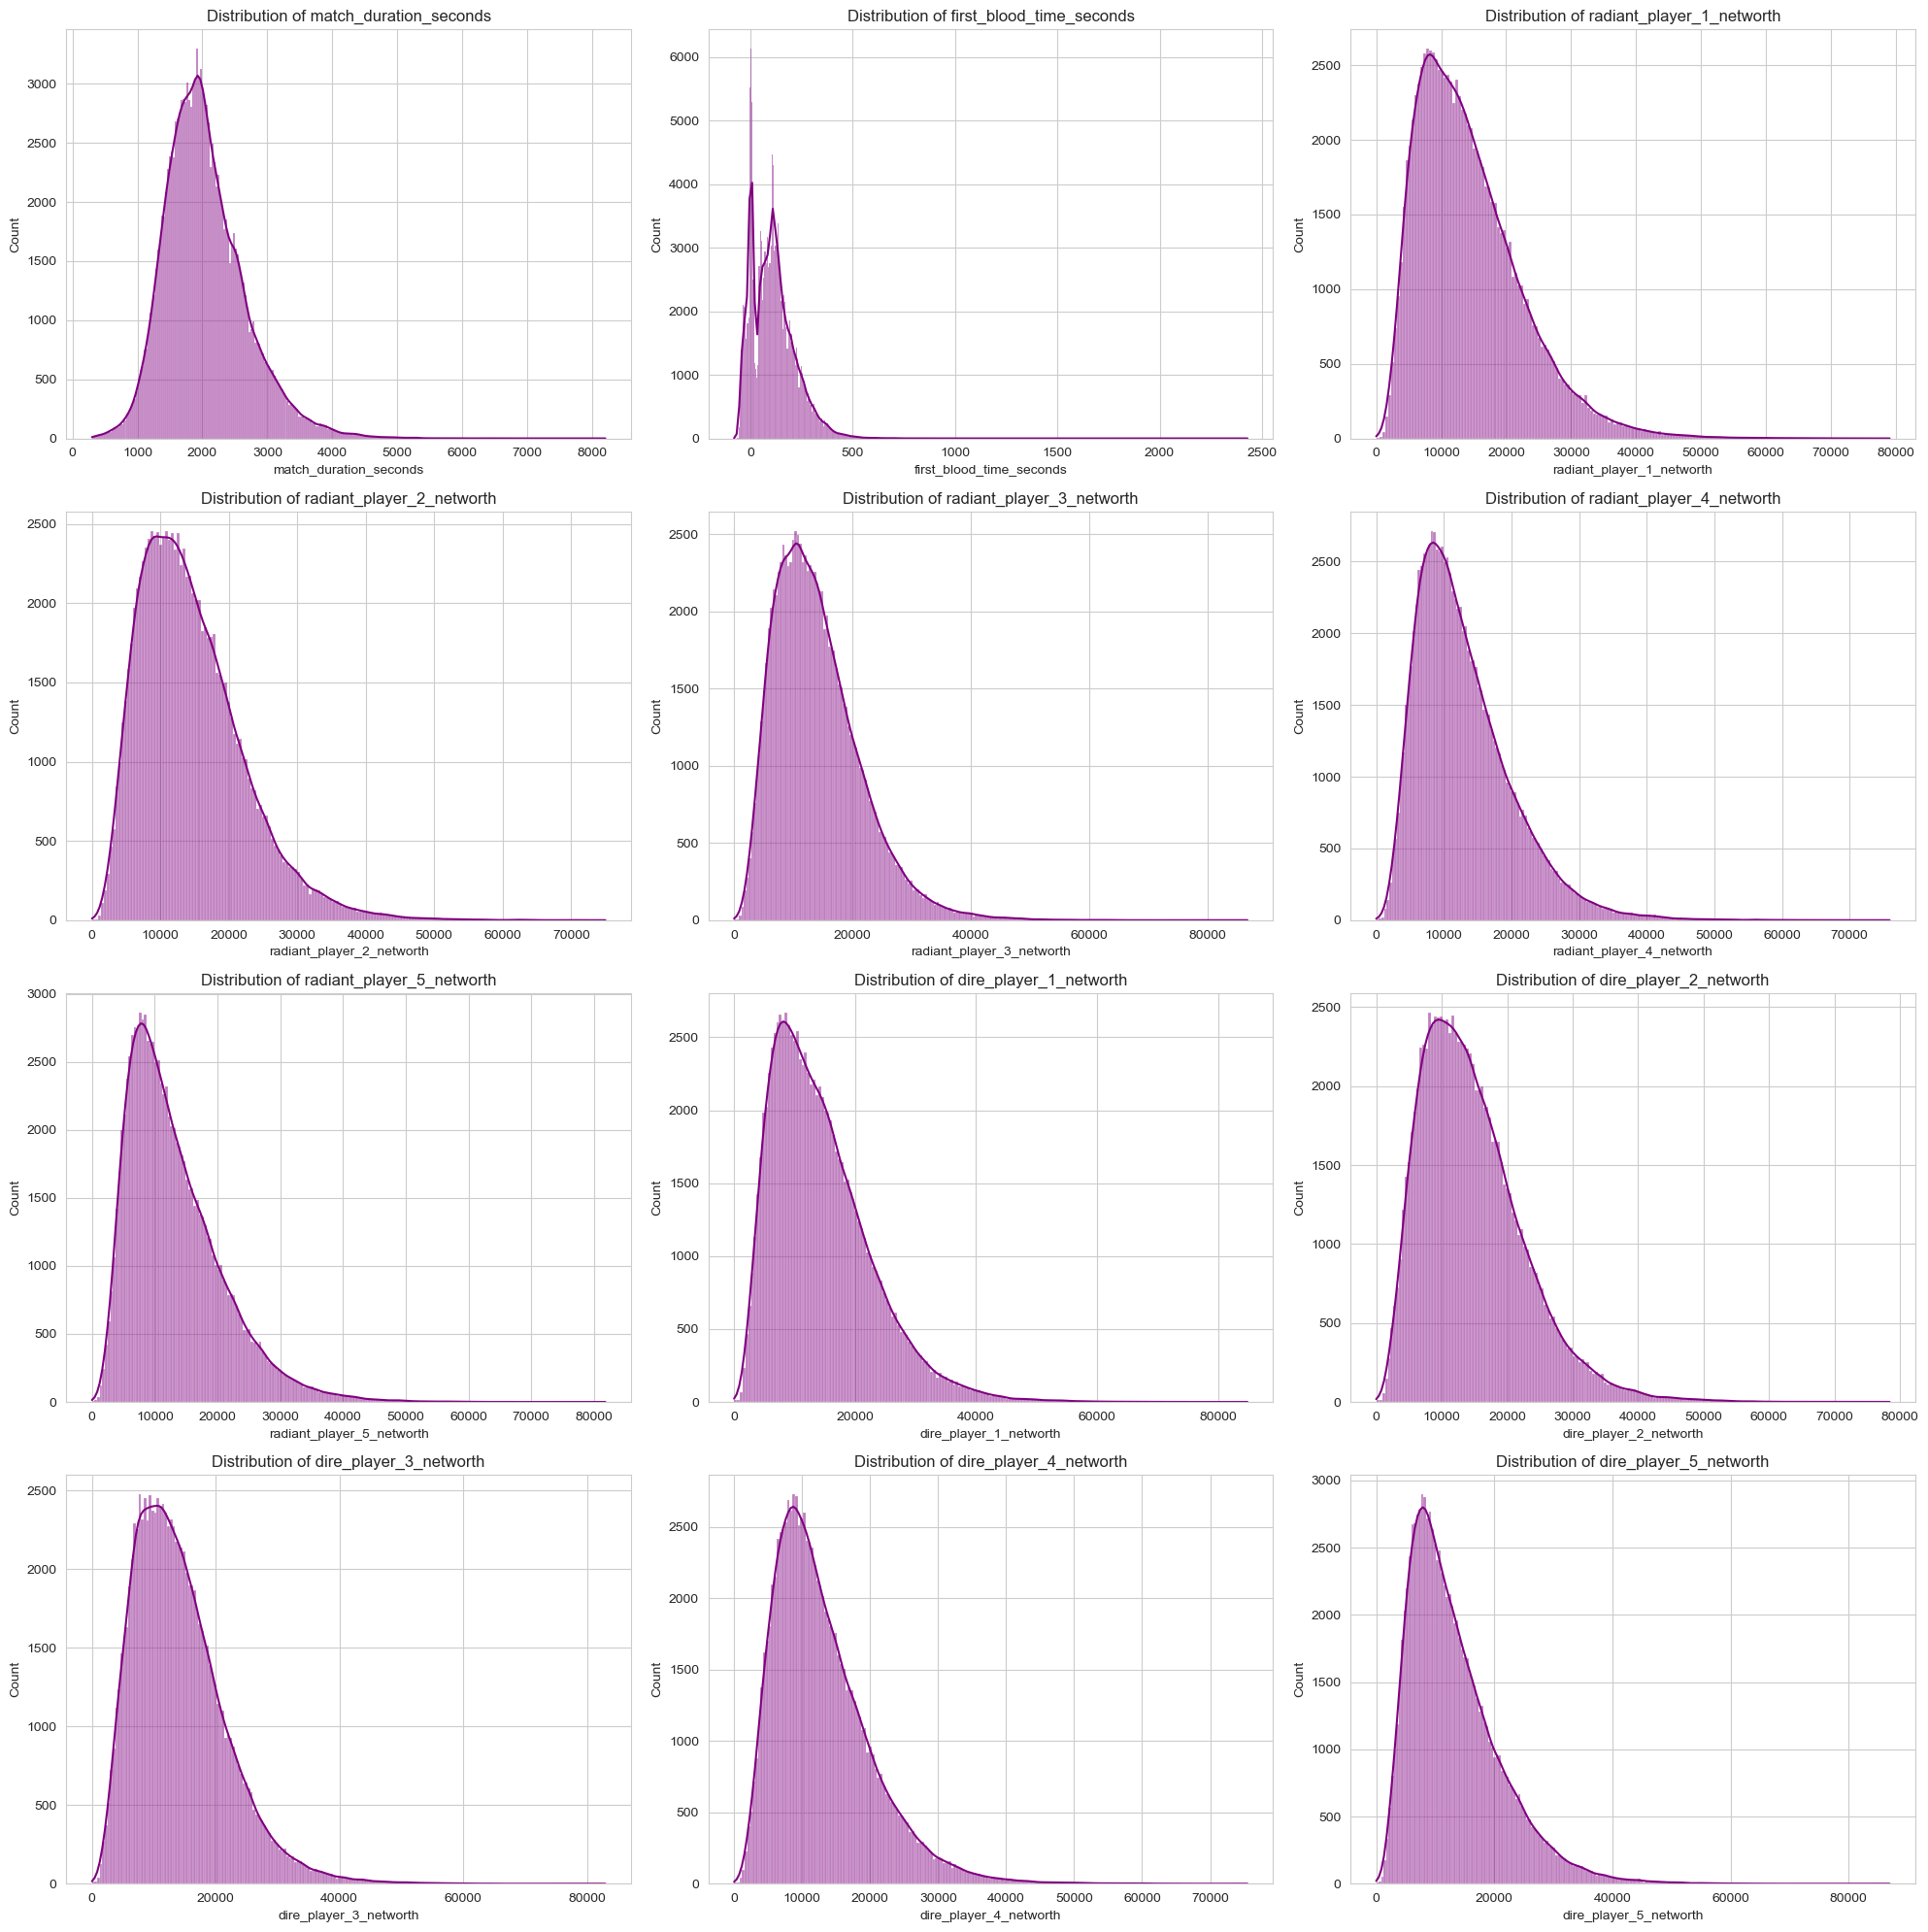

In [260]:
plot_univariate_distribution_numeric(numeric_cols, 3)

Con los histogramas, de las variables numéricas podemos identificar:
* Las partidas suelen durar (match_duration_seconds) entre 1500 y 2500 mayormente, pero el rango general es de 1000 a 3000 segundos
* Las primeras sangres (first_blood_time_seconds) suelen ocurrir aproximadamente en los primeros 5 minutos de partida, y hay casos donde ocurre en los segundos antes antes de que inicie la partida (< 0)
* El valor neto (player networth) en general vemos que es similar, llega hasta los 2000 y 3000, pero el problema es que en esta columna tenemos datos faltantes, que quizás sesgan un poco esta información

* Ahora probaremos con boxplots

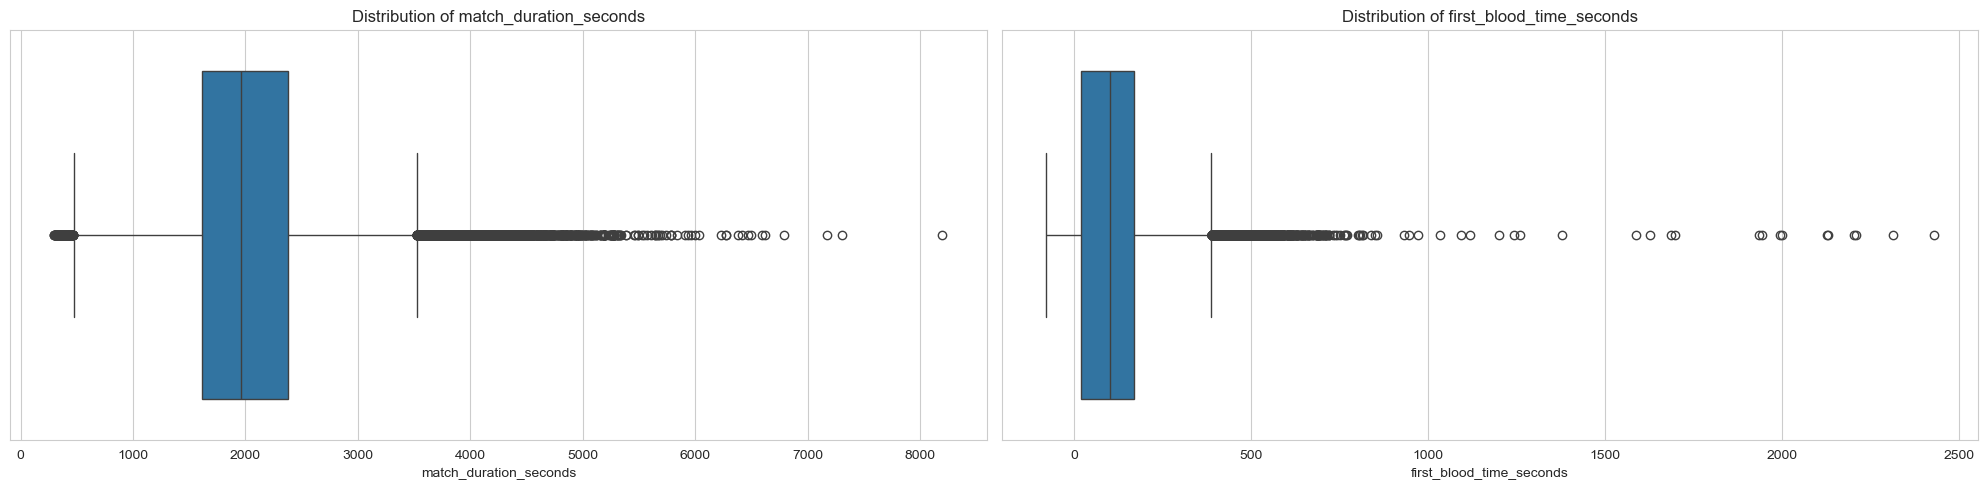

In [261]:
plot_univariate_distribution_numeric(['match_duration_seconds', 'first_blood_time_seconds'], 2, 'box')

* Acá confirmamos la distribución, vemos que la mediana es 2000 aproximadamente el duración del juego y que la mayor cantidad de juegos duran de 1500 a 2500 segundos aproximadamente
* Podemos ver presencia de outliers (valores atípicos), ya que según esto hay casos donde hay juegos que duran más de 7000 segundos, y hasta más que 8000, que equivaldría a más de 2 horas de juego, lo cual no es imposible, pero sí es muy raro

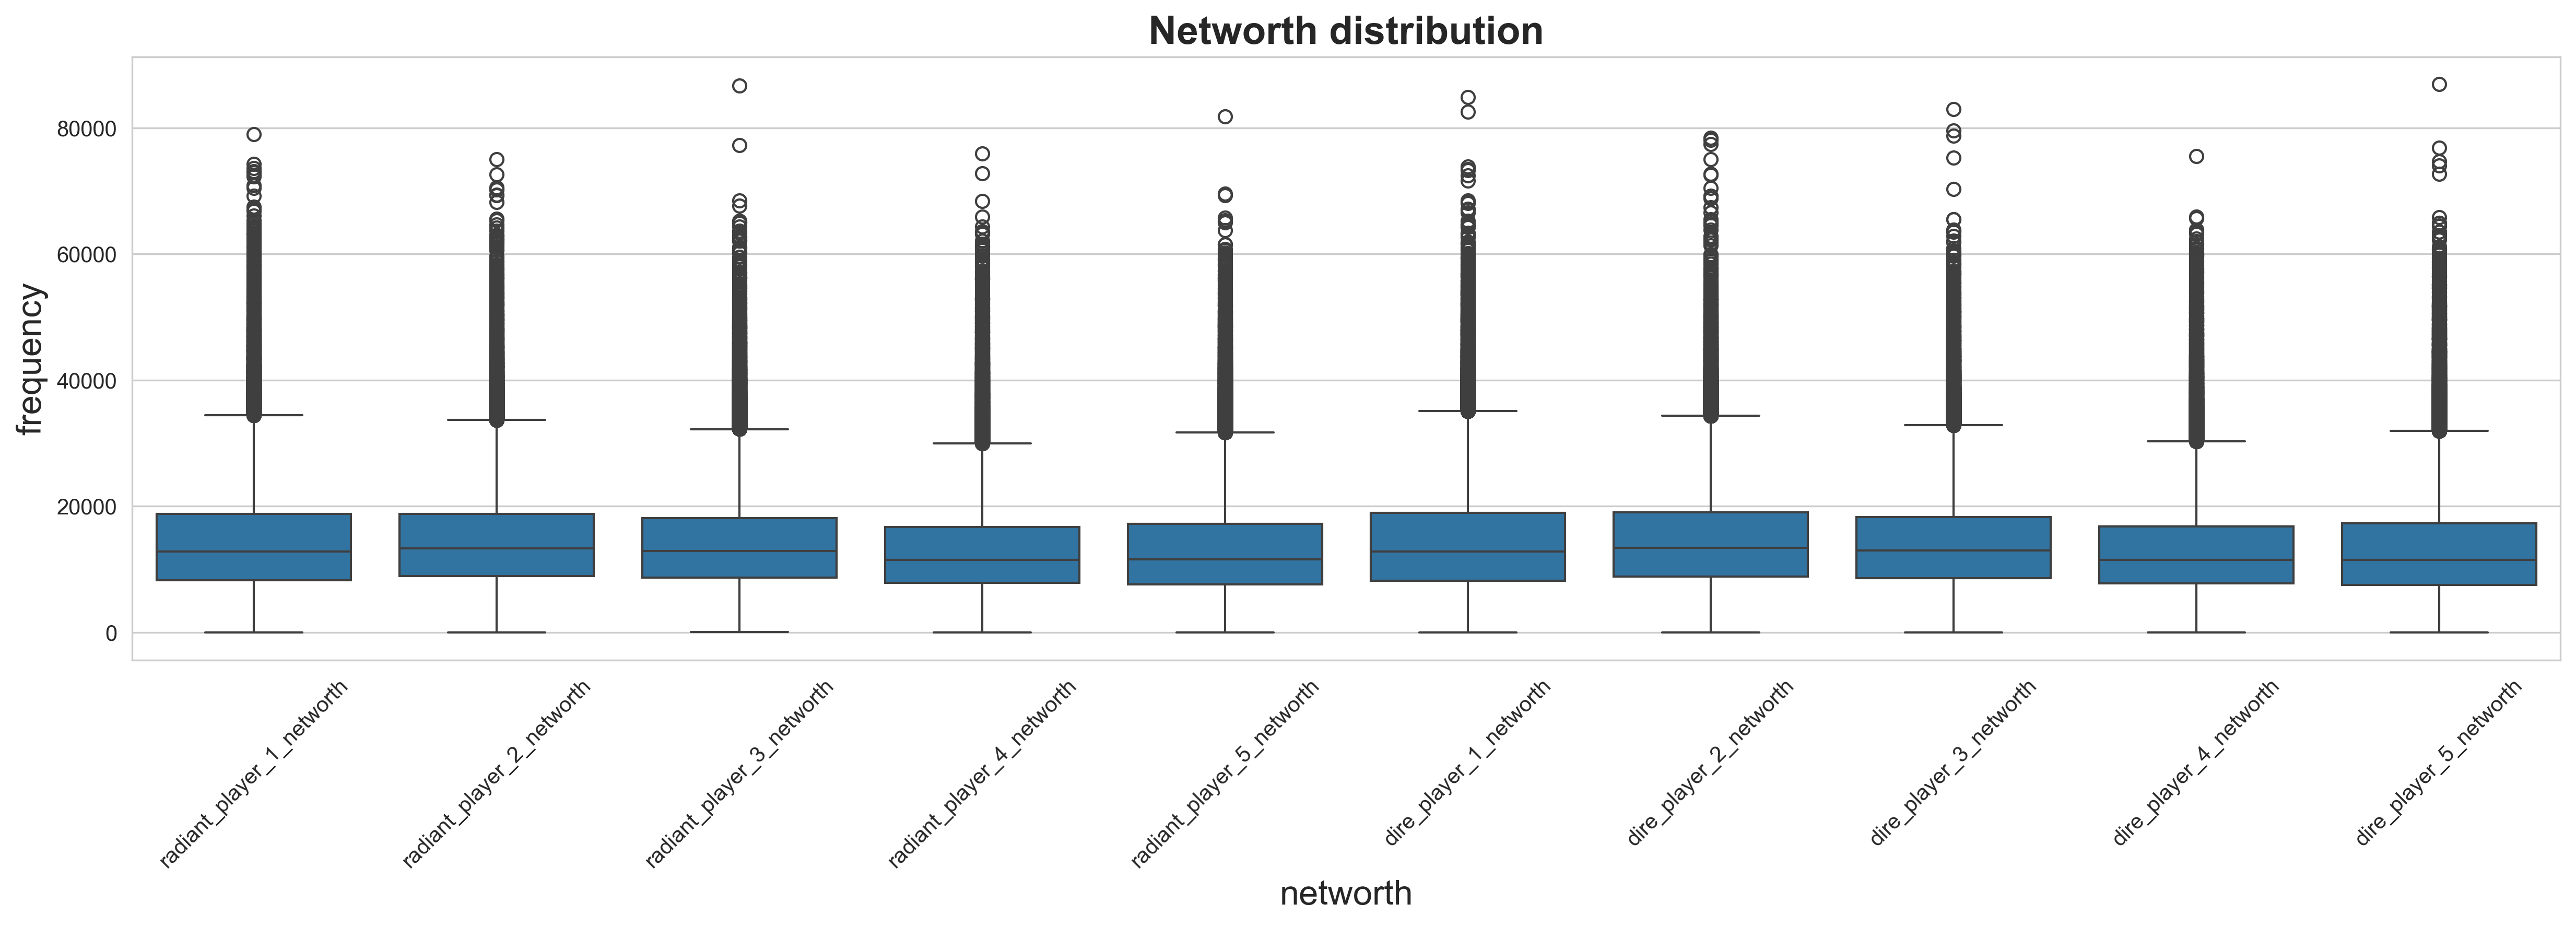

In [262]:
networth_cols = [col for col in numeric_cols if col not in ['match_duration_seconds', 'first_blood_time_seconds']]

plt.figure(figsize=(20,5), dpi=300)
df_melted = pd.melt(df, value_vars=networth_cols)
sns.boxplot(df_melted, x='variable', y='value')
plt.title('Networth distribution', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('networth', fontsize=16)
plt.ylabel('frequency', fontsize=16)
plt.show()

* Para el caso de los networth, vemos que su distribución es normal lo cual es normal ya que el networth depende del rol del jugador y posición, no en las divisiones de jugador 1,2,3,4 o 5

    * Ahora antes de pasar al análisis bivariado, vamos a definir la variable objetivo (target) para el análisis y futuro modelo de machine learning de ser posible. Así que lo más adecuado para este dataset sería la columna "radiant_win" ya que se podría hacer un modelo de regresión logística para predecir si un equipo va a ganar o no en base a los datos brindados


Generando el gráfico de distribución de victorias...


C:\Users\RAFAEL-PC\AppData\Local\Temp\ipykernel_2844\3951727790.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Dire Wins', 'Radiant Wins'], fontsize=11)


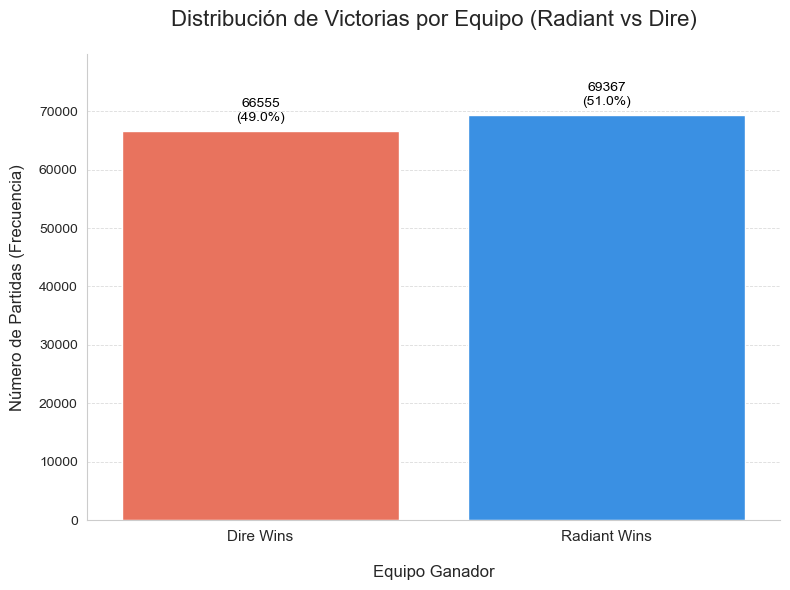

In [264]:

# COUNPLOT PROVIDED BY GEMINI 2.5
np.random.seed(42) # para reproducibilidad

# --- Asegurar el tipo de dato correcto (int) ---
if df['radiant_win'].dtype == 'object':
    df['radiant_win'] = df['radiant_win'].astype(int)

# --- Calcular Frecuencias y Total (necesario para anotaciones) ---
counts = df['radiant_win'].value_counts().sort_index() # Asegura orden 0, 1
total = len(df)

# =====================================================================
# Gráfico de Barras (Countplot) con Seaborn y Refinamientos Matplotlib
# =====================================================================
print("Generando el gráfico de distribución de victorias...")

# --- Configuración de Estilo Opcional (Seaborn) ---
# sns.set_theme(style="whitegrid") # Puedes probar diferentes estilos

plt.figure(figsize=(8, 6)) # Tamaño adecuado para la legibilidad

# --- Crear el Countplot ---
# Usamos una paleta de colores que contraste bien. Puedes personalizarla.
# 'order=[0, 1]' asegura que Dire (0) esté a la izquierda y Radiant (1) a la derecha.
ax = sns.countplot(data=df,
                   x='radiant_win',
                   hue='radiant_win',
                   legend=False,
                   palette=['#FF6347', '#1E90FF'], # Rojo Tomate para Dire (0), Azul Dodger para Radiant (1) - Ejemplo
                   order=[0, 1])

# --- Mejoras Profesionales y Etiquetas Precisas ---

# 1. Título claro y descriptivo
ax.set_title('Distribución de Victorias por Equipo (Radiant vs Dire)', fontsize=16, pad=20)

# 2. Etiquetas de ejes informativas
ax.set_xlabel('Equipo Ganador', fontsize=12, labelpad=15)
ax.set_ylabel('Número de Partidas (Frecuencia)', fontsize=12, labelpad=10)

# 3. Etiquetas específicas en el eje X
#    Asegúrate de que estas etiquetas corresponden al 'order=[0, 1]'
ax.set_xticklabels(['Dire Wins', 'Radiant Wins'], fontsize=11)
ax.tick_params(axis='x', rotation=0) # Asegurar que las etiquetas no se roten si son cortas

# 4. Añadir Anotaciones (Conteo y Porcentaje) sobre cada barra
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    value = counts.iloc[i] # Obtenemos el valor del conteo correspondiente a la barra
    percentage = f'{100 * value / total:.1f}%' # Calcular porcentaje
    
    # Colocar el texto sobre la barra
    ax.annotate(f'{value}\n({percentage})', # Texto: conteo y porcentaje
                xy=(bar.get_x() + bar.get_width() / 2, height), # Posición XY (centro superior de la barra)
                xytext=(0, 5),  # Desplazamiento vertical de 5 puntos
                textcoords="offset points",
                ha='center', va='bottom', # Alinear centro horizontal, anclaje inferior
                fontsize=10, color='black') # Tamaño y color de fuente

# 5. Mejorar Estética del Gráfico
ax.spines['top'].set_visible(False)    # Ocultar borde superior
ax.spines['right'].set_visible(False)   # Ocultar borde derecho
ax.yaxis.grid(True, linestyle='--', linewidth=0.6, alpha=0.7) # Rejilla horizontal sutil
ax.set_axisbelow(True) # Poner la rejilla detrás de las barras

# 6. Ajustar límite del eje Y para dar espacio a las anotaciones
#    Multiplicamos el máximo conteo por 1.15 para dejar un 15% de espacio extra
try:
    max_count = counts.max()
    ax.set_ylim(0, max_count * 1.15)
except ValueError: # Manejar caso donde no haya datos
    ax.set_ylim(0, 1) 

# 7. Ajuste final del layout
plt.tight_layout()

# --- Mostrar el Gráfico ---
# plt.savefig('distribucion_victorias_radiant_dire.png', dpi=300) # Descomentar para guardar
plt.show()